<a href="https://colab.research.google.com/github/ivyar/DA_labs/blob/main/Lab%202/DA_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

from time import time


from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

from PIL import Image

import string
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

import spacy
nlp = spacy.load("en_core_web_sm")

from wordcloud import WordCloud

In [32]:
raisin = pd.read_excel('Raisin_Dataset.xlsx')
raisin.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen

In [33]:
X_raw = raisin.drop("Class", axis=1)
y = raisin.Class

scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

In [34]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [35]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

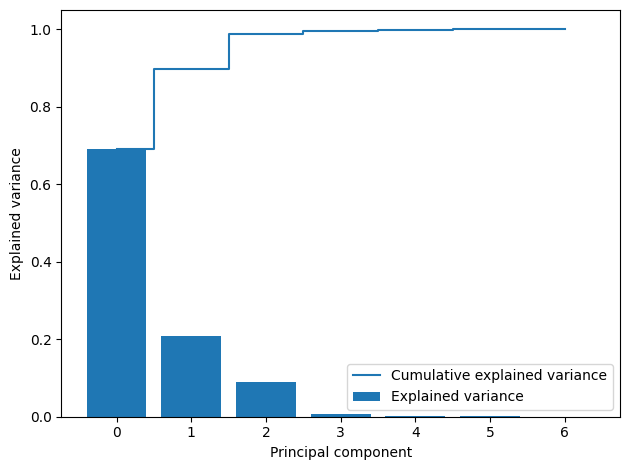

In [36]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [37]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [38]:
np.sum(pca.explained_variance_ratio_)

0.8979252929009325

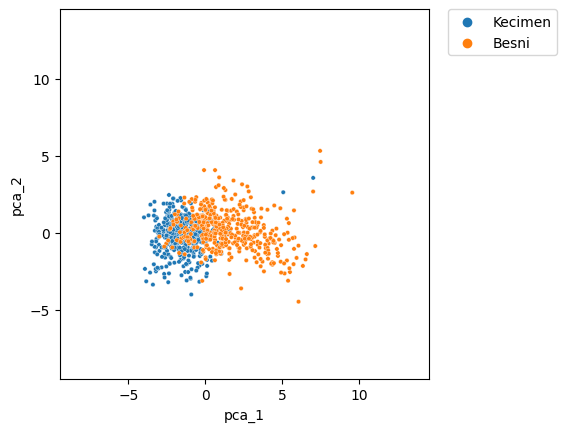

In [39]:
pca_result_raisin = pd.DataFrame({'pca_1': X_reduced[:,0], 'pca_2': X_reduced[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_raisin, ax=ax,s=10)
lim = (X_reduced.min()-5, X_reduced.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

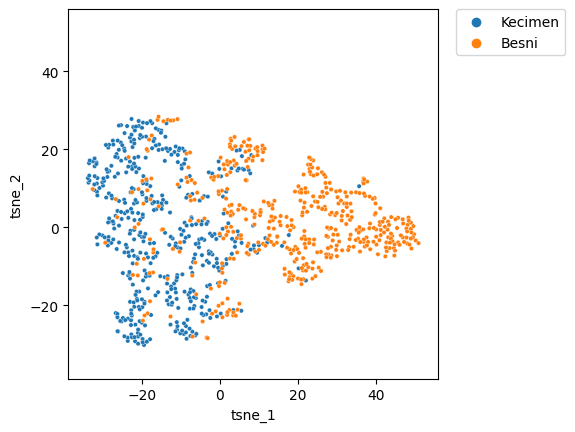

In [40]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

tsne_result_raisin = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_raisin, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

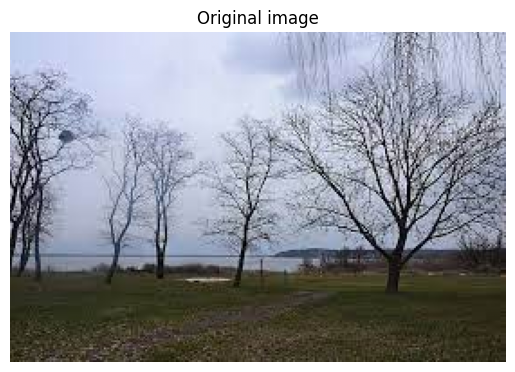

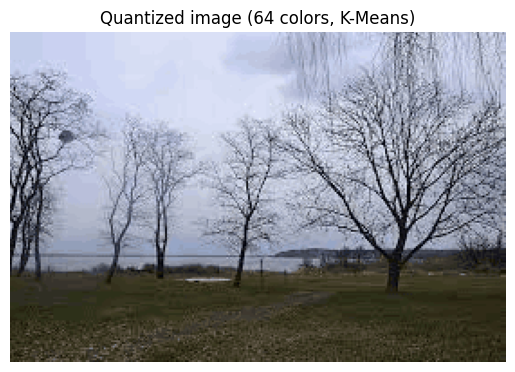

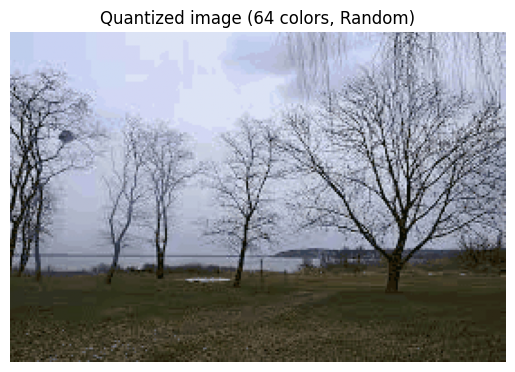

In [41]:
n_colors = 64

trees = Image.open("trees.jpg")
trees = np.array(trees, dtype=np.float64) / 255

w, h, d = original_shape = tuple(trees.shape)
image_array = np.reshape(trees, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)

labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(trees)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

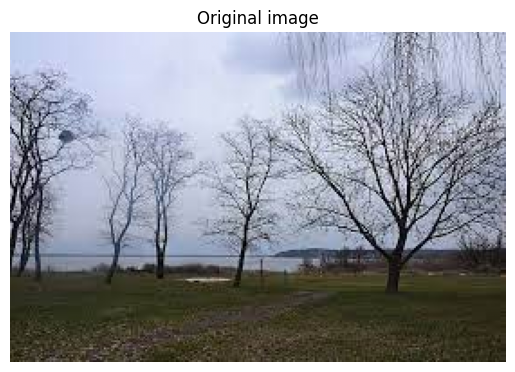

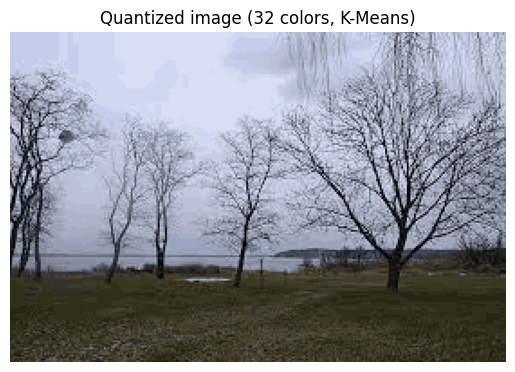

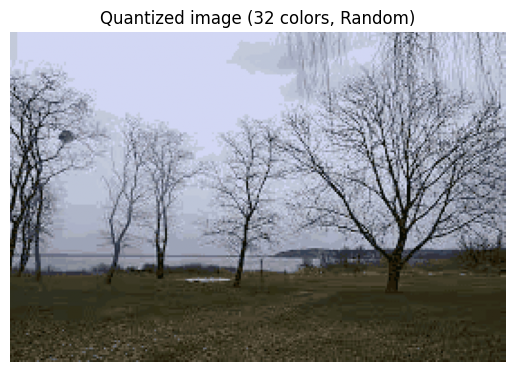

In [42]:
n_colors = 32

kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)

labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(trees)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

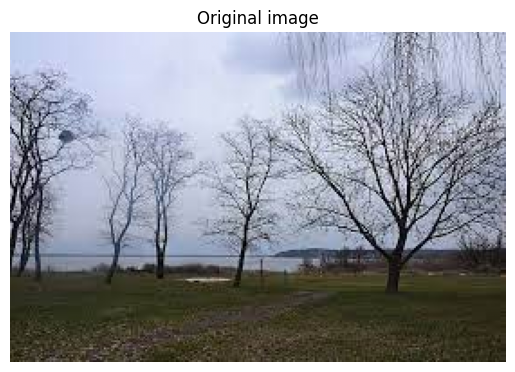

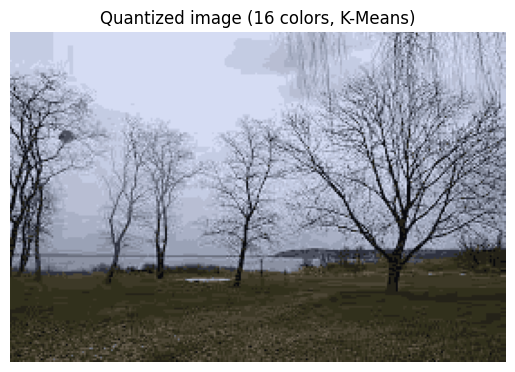

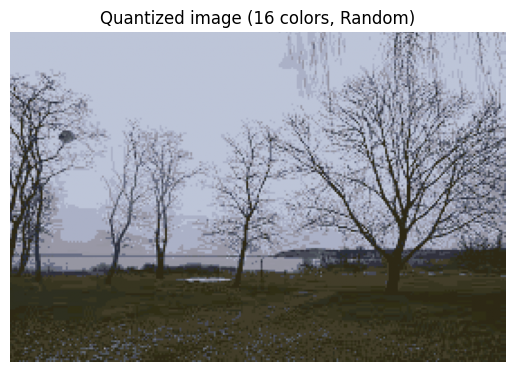

In [43]:
n_colors = 16

kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)

labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(trees)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

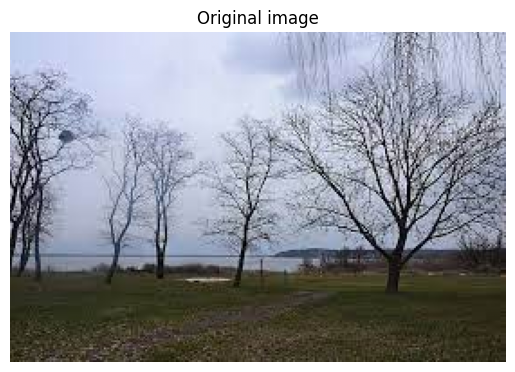

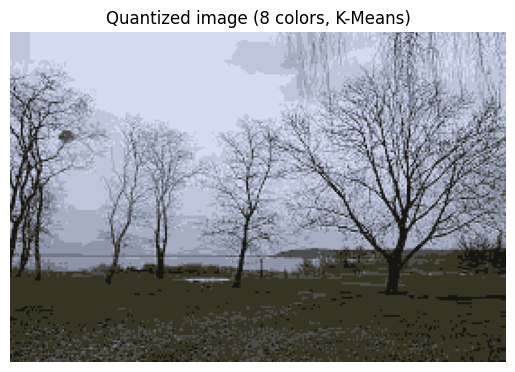

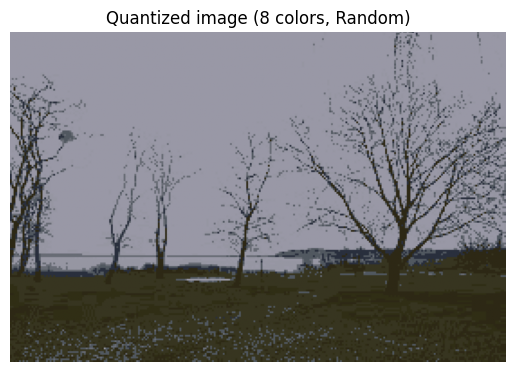

In [44]:
n_colors = 8

kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)

labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(trees)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [45]:
data = pd.read_csv('ecommerceDataset.csv',header=None)
data.columns =['label','text']
data.head()

label                                               text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

In [46]:
data.isnull().sum()

label    0
text     1
dtype: int64

In [47]:
data.duplicated().sum()

22622

In [48]:
data.describe()

label                                               text
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                                                 30

In [49]:
data.dropna(inplace=True)

In [50]:
data.drop_duplicates(inplace=True)

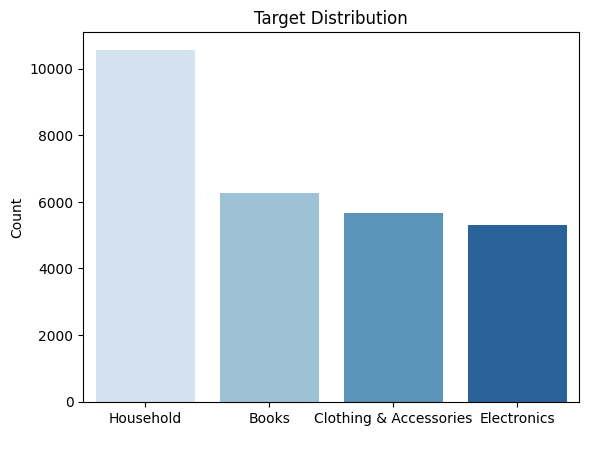

In [51]:
sns.countplot(x='label',data=data,palette='Blues')
plt.xlabel(' ')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

In [52]:
def remove_punct(text):

    punctuations =string.punctuation
    mytokens = ''.join(word for word in text if word not in punctuations)

    return mytokens

In [53]:
def remove_stopwords(text):

    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    mytokens = [word for word in text if word not in stop_words]

    return mytokens

In [54]:
nlp.max_length = 19461259

def tokenization(text):

    token = nlp(text)
    token = [word.lemma_ for word in token]
    token = [ word.lower() for word in token]

    return token

In [55]:
def text_norm(text):

    punct_text = remove_punct(text)
    tokens = tokenization(punct_text)
    final_tokens = remove_stopwords(tokens)

    return final_tokens

In [56]:
tf_idf = TfidfVectorizer(min_df=2,max_df=0.90,tokenizer=text_norm,ngram_range=(1,1))

In [57]:
X = data['text']
y = data['label']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

                        precision    recall  f1-score   support

                 Books       0.96      0.94      0.95      1922
Clothing & Accessories       0.98      0.96      0.97      1757
           Electronics       0.95      0.91      0.93      1557
             Household       0.93      0.97      0.95      3105

              accuracy                           0.95      8341
             macro avg       0.95      0.94      0.95      8341
          weighted avg       0.95      0.95      0.95      8341



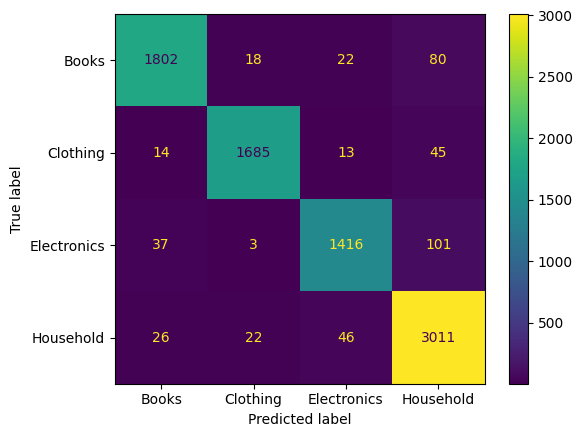

In [58]:
pipe_tf = Pipeline([
                    ('vectorizer', tf_idf),
                    ('classifier', LogisticRegression())])


pipe_tf.fit(X_train,y_train)
y_pred_tf = pipe_tf.predict(X_test)

print(classification_report(y_test,y_pred_tf))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_tf),display_labels=['Books','Clothing','Electronics','Household']).plot()

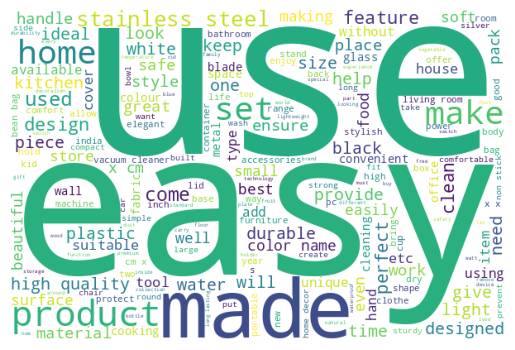

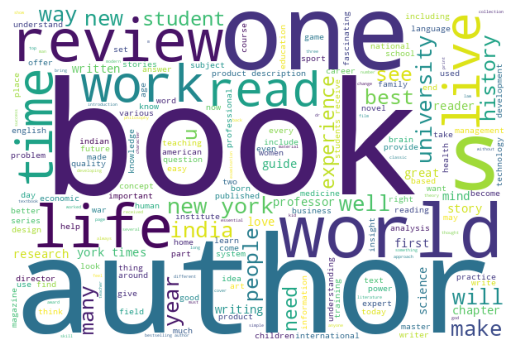

In [60]:
def visualize(label):
    text = ''
    for msg in data[data['label'] == label]['text']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('Household')
visualize('Books')